In [1]:
from PIL import Image
import atomai as aoi
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import sys
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath('..'))

In [2]:
from functions import finding_defects as df
from functions import finetuning_training as utils

## generate random value for each model/training dataset

In [ ]:
rand = np.random.randint(0, 100000)

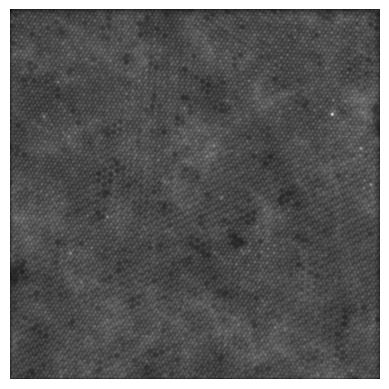

In [3]:
file = "../data/images/Mxene_24_A1_0050.jpg"
big_image = Image.open(file).convert("L")  
plt.imshow(big_image, cmap = "gray")
plt.axis("off")
plt.show()

## run to make & save training data 

In [7]:
"""size_range = [200,300]
iter = 300
crops, coords = utils.crop_random_patches(big_image, iter, size_range= size_range)
model = utils.load_atomai_model("../data/models/base_model.tar")
images, masks = utils.build_image_and_mask_lists(crops, model, df)
print(f"Total images: {len(images)}, Total masks: {len(masks)}")

filename = f"training_data/masks_images_{rand}.npz"
np.savez(
    filename,
    masks=np.array(masks),
    images=np.array(images),
    rand=rand
)
print(f"Saved to {filename}")"""

'size_range = [200,300]\niter = 300\ncrops, coords = utils.crop_random_patches(big_image, iter, size_range= size_range)\nmodel = utils.load_atomai_model("../data/models/base_model.tar")\nimages, masks = utils.build_image_and_mask_lists(crops, model, df)\nprint(f"Total images: {len(images)}, Total masks: {len(masks)}")\n\nrand = np.random.randint(0, 100000)\nfilename = f"training_data/masks_images_{rand}.npz"\nnp.savez(\n    filename,\n    masks=np.array(masks),\n    images=np.array(images),\n    rand=rand\n)\nprint(f"Saved to {filename}")'

## or load pre-made training data

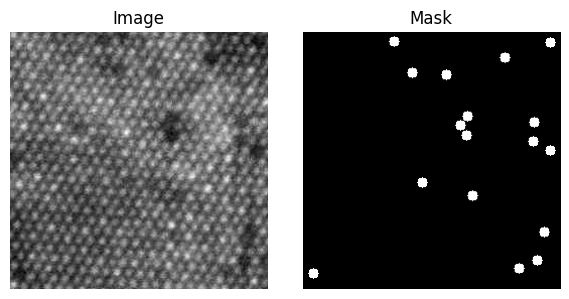

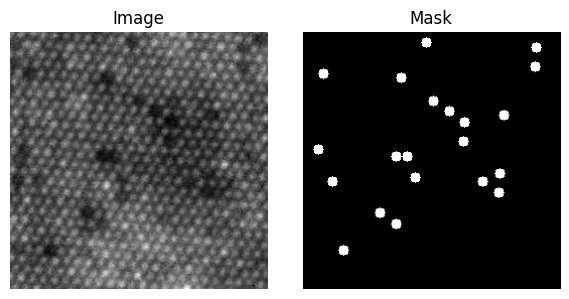

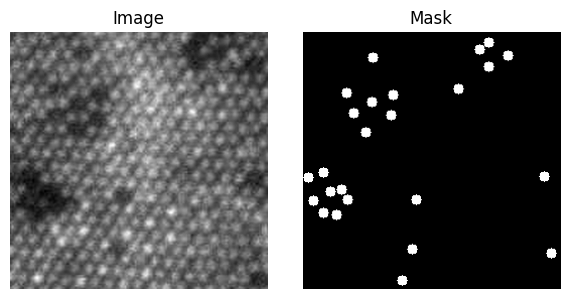

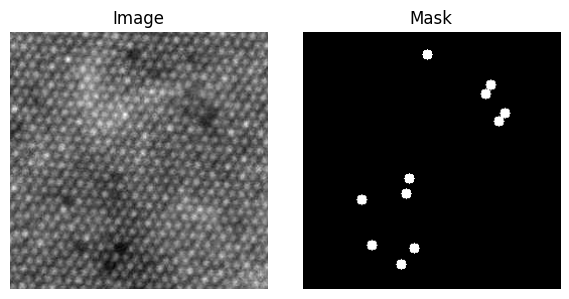

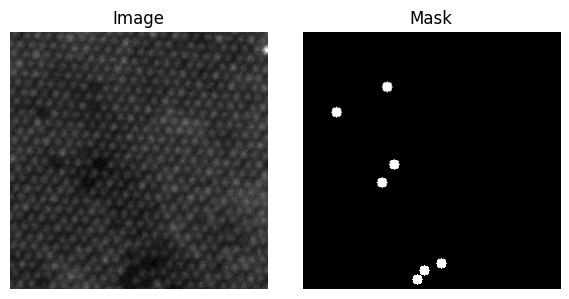

In [10]:
filename = 'training_data/masks_images_33483.npz'
data = np.load(filename)
saved_rand = int(data["rand"])

masks = data['masks']
images = data['images']


for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    axs[0].imshow(images[i+50], cmap='gray')
    axs[0].set_title('Image')
    axs[0].axis('off')

    axs[1].imshow(masks[i+50], cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

## Train & Save Model

Epoch 1/350 ... Training loss: 0.8181 ... Test loss: 0.7707 ... Train Accuracy: 0.1453 ... Test Accuracy: 0.0093 ... GPU memory usage: N/A / N/A
Epoch 100/350 ... Training loss: 0.531 ... Test loss: 0.4873 ... Train Accuracy: 0.6667 ... Test Accuracy: 0.6561 ... GPU memory usage: N/A / N/A
Epoch 200/350 ... Training loss: 0.2551 ... Test loss: 0.2417 ... Train Accuracy: 0.7114 ... Test Accuracy: 0.7204 ... GPU memory usage: N/A / N/A
Epoch 300/350 ... Training loss: 0.1301 ... Test loss: 0.1208 ... Train Accuracy: 0.6821 ... Test Accuracy: 0.725 ... GPU memory usage: N/A / N/A
Epoch 350/350 ... Training loss: 0.0946 ... Test loss: 0.0895 ... Train Accuracy: 0.7275 ... Test Accuracy: 0.6956 ... GPU memory usage: N/A / N/A
Model (final state) evaluation loss: 0.0874
Model (final state) accuracy: 0.7127
Plotting training history


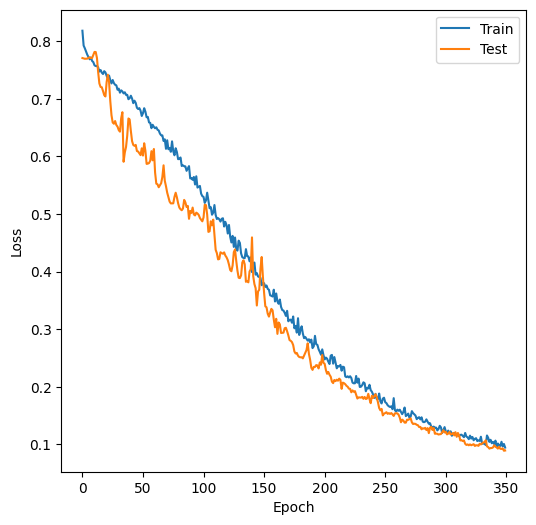

In [11]:
images = images[:, np.newaxis]
masks = np.array(masks)[:, np.newaxis]

model = aoi.models.Segmentor(nb_classes=1)
model.fit(images, masks, 
          training_cycles=350, batch_size = 16, compute_accuracy=True, rotation = True, gauss_noise= [40, 100], jitter = True)

In [12]:
from pathlib import Path

save_dir  = Path("training_data"); save_dir.mkdir(exist_ok=True)
stem = save_dir / f"defect_finder_{rand}"  
model.save_model(str(stem))                
defect_finder_model = utils.load_atomai_model(str(stem) + ".tar")


## visualize model performance on training data

Batch 1/1
1 image was decoded in approximately 0.0433 seconds


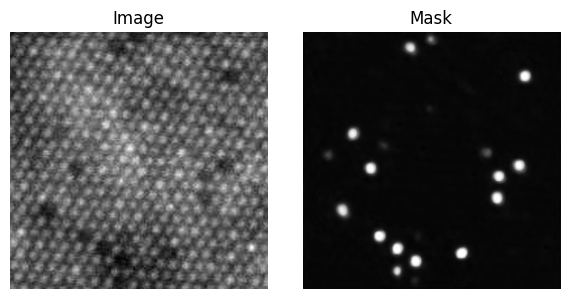

In [22]:
i = 10
image = Image.fromarray(images[i][0])
mask = utils.get_mask(defect_finder_model, image, size=(256, 256))
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(images[i][0], cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Visualize performance on (unseen) experimental data

Batch 1/1
1 image was decoded in approximately 0.1393 seconds


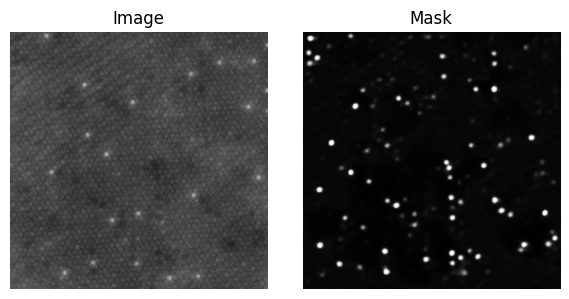

In [36]:
i = 18
folder_path = "../data/images/12_5HF"
file_list = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.tif')]
test_images = [Image.open(file) for file in file_list]
image = test_images[i]
mask = utils.get_mask(defect_finder_model, image, size=(512, 512))
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(np.array(image), cmap='gray')
axs[0].set_title('Image')
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()